## 4 - Binary analysis
## Note that we have already cleaned all the data and decided the variables we prefer to use, we now start data analysis. Given that people's happiness level is scaled from 0 to 10, so we need to convert this measure into binary variable and then do some binary analysis in this part.

## 4.1 - Dataframe building

In [1]:
import numpy as np
import pandas as pd

In [5]:
var_sel = pd.read_excel('FINAL - Selected Variables.xlsx', sheet_name = 'Summary', index_col = None)
var_sel.head()

,Unnamed: 0,CODE,IS_NUMERIC,N_UNIQUE,NA_ABS,NA_REL,MIN,MAX,MEAN,MEDIAN,CORR_TARGET,SHARE_MOST_FREQ
0,AGE,agea,1,75,21,0.01,16,90,51.28,52,-0.21,0.02
1,ASHAMED_LGBTQ,hmsfmlsh,1,5,139,0.05,1,5,3.86,4,0.17,0.36
2,DOMICILE,domicil,1,5,9,0.00,1,5,3.20,3,0.04,0.43
3,EDUCATION_YEARS,eduyrs,1,30,85,0.03,0,37,11.50,12,0.19,0.23
4,FUTURE_PLANNING,plnftr,1,11,0,0.00,0,10,4.88,5,-0.16,0.14


In [6]:
individuals = pd.read_excel('cleaned data.xlsx', sheet_name = 'ESS9e03.1_F1', index_col = None)
individuals.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dweight,pspwght,pweight,anweight
0,ESS9e03_1,9,3.1,17.02.2021,3,IT,60,4,120,2,...,0,1,0,0,0,0,1.019588,0.924885,1.909064,1.765664
1,ESS9e03_1,9,3.1,17.02.2021,13,IT,8888,5,240,5,...,0,1,0,0,0,0,1.038898,0.954811,1.909064,1.822796
2,ESS9e03_1,9,3.1,17.02.2021,31,IT,30,5,180,4,...,0,0,0,0,0,0,1.050053,0.816516,1.909064,1.558781
3,ESS9e03_1,9,3.1,17.02.2021,58,IT,900,5,180,6,...,0,0,0,0,0,0,0.872215,0.986662,1.909064,1.883601
4,ESS9e03_1,9,3.1,17.02.2021,122,IT,60,5,15,2,...,0,0,0,0,0,0,1.019588,1.436108,1.909064,2.741621


### We create a copy of 'individuals' dataframe to easily edit and analyse on it.

In [7]:
ind = individuals.copy()
ind.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dweight,pspwght,pweight,anweight
0,ESS9e03_1,9,3.1,17.02.2021,3,IT,60,4,120,2,...,0,1,0,0,0,0,1.019588,0.924885,1.909064,1.765664
1,ESS9e03_1,9,3.1,17.02.2021,13,IT,8888,5,240,5,...,0,1,0,0,0,0,1.038898,0.954811,1.909064,1.822796
2,ESS9e03_1,9,3.1,17.02.2021,31,IT,30,5,180,4,...,0,0,0,0,0,0,1.050053,0.816516,1.909064,1.558781
3,ESS9e03_1,9,3.1,17.02.2021,58,IT,900,5,180,6,...,0,0,0,0,0,0,0.872215,0.986662,1.909064,1.883601
4,ESS9e03_1,9,3.1,17.02.2021,122,IT,60,5,15,2,...,0,0,0,0,0,0,1.019588,1.436108,1.909064,2.741621


### We notice that all the individuals here have a same name: ESS9e03_1, which brings trouble to our further analysis. So, we transform all the names into integers, each integer represents for an individual.

In [12]:
for i in range (0, len(ind)):
    ind['name'][i] = ind.index[i]
ind.tail()

C:\Users\tjuyu\AppData\Local\Temp/ipykernel_32404/1072192409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['name'][i] = ind.index[i]


,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dweight,pspwght,pweight,anweight
2740,2740,9,3.1,17.02.2021,69926,IT,30,3,6666,2,...,0,0,0,1,0,0,1.038898,0.893788,1.909064,1.706298
2741,2741,9,3.1,17.02.2021,69938,IT,90,1,6666,4,...,0,0,0,1,0,0,1.019588,1.234041,1.909064,2.355862
2742,2742,9,3.1,17.02.2021,69943,IT,60,5,30,5,...,0,0,0,1,0,0,1.006348,0.923270,1.909064,1.762582
2743,2743,9,3.1,17.02.2021,69951,IT,8888,5,8888,2,...,0,0,0,0,0,0,1.026267,1.042375,1.909064,1.989960
2744,2744,9,3.1,17.02.2021,69961,IT,10,5,150,8,...,0,0,0,0,0,0,1.050053,0.965064,1.909064,1.842369


### In our 'ind' dataframe, all the features of an individual are displayed. However, we only need the key features in our binary analysis, so we use dataframes 'ind' and 'var_sel' together to slim 'ind', and create a new dataframe named 'people' which only contains the name of all individuals and the variables we selected in data cleaning part.

In [38]:
people = ind.copy()
cols = var_sel['CODE']
people = ind[cols]
people = pd.concat([ind['name'], people], axis = 1)
people

,name,agea,hmsfmlsh,domicil,eduyrs,plnftr,chldhhe,dvrcdeva,imwbcnt,netusoft,...,atcherp,hlthhmp,happy,health,pplfair,ppltrst,sclact,trstlgl,trstplc,trstplt
0,0,38,4,4,13,9,6,2,3,4,...,6,2,8,3,3,2,3,6,7,4
1,1,17,5,4,10,6,2,2,88,5,...,7,2,5,3,5,5,2,88,7,88
2,2,28,5,3,15,3,2,2,5,5,...,7,3,8,2,4,4,3,7,6,5
3,3,29,5,4,20,2,2,2,8,5,...,7,3,8,2,6,6,3,8,6,5
4,4,45,5,4,8,10,6,2,1,5,...,0,3,7,3,3,2,3,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,2740,75,2,3,5,0,2,2,5,3,...,2,3,9,2,7,2,3,5,7,0
2741,2741,999,2,4,13,1,1,2,6,1,...,5,3,7,2,5,4,3,3,6,0
2742,2742,67,4,3,13,3,6,2,6,5,...,8,3,8,2,5,5,3,8,7,3
2743,2743,18,5,3,12,5,2,2,9,5,...,9,3,9,2,5,2,3,5,7,4


### Now we can see that in this 'people' dataframe, we have all the individuals and all the key features we selected. In order to do a binary analysis, we convert 'happy' into a binary variable and the criteria is that 'happy's between 0 and 5 would be transformed into 0 and those between 6 and 10 would be transformed into 1.

In [39]:
for i in range (0, len(people)):
    if people['happy'][i] <= 5:
        people['happy'][i] = 0
    else:
        people['happy'][i] = 1

C:\Users\tjuyu\AppData\Local\Temp/ipykernel_32404/474330598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people['happy'][i] = 1
C:\Users\tjuyu\AppData\Local\Temp/ipykernel_32404/474330598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people['happy'][i] = 0


In [40]:
people

,name,agea,hmsfmlsh,domicil,eduyrs,plnftr,chldhhe,dvrcdeva,imwbcnt,netusoft,...,atcherp,hlthhmp,happy,health,pplfair,ppltrst,sclact,trstlgl,trstplc,trstplt
0,0,38,4,4,13,9,6,2,3,4,...,6,2,1,3,3,2,3,6,7,4
1,1,17,5,4,10,6,2,2,88,5,...,7,2,0,3,5,5,2,88,7,88
2,2,28,5,3,15,3,2,2,5,5,...,7,3,1,2,4,4,3,7,6,5
3,3,29,5,4,20,2,2,2,8,5,...,7,3,1,2,6,6,3,8,6,5
4,4,45,5,4,8,10,6,2,1,5,...,0,3,1,3,3,2,3,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,2740,75,2,3,5,0,2,2,5,3,...,2,3,1,2,7,2,3,5,7,0
2741,2741,999,2,4,13,1,1,2,6,1,...,5,3,1,2,5,4,3,3,6,0
2742,2742,67,4,3,13,3,6,2,6,5,...,8,3,1,2,5,5,3,8,7,3
2743,2743,18,5,3,12,5,2,2,9,5,...,9,3,1,2,5,2,3,5,7,4


In [41]:
people['happy'].sum()

2312

### The sum of the column 'happy' is 2312, which means there are 2312 individuals in our dataset having a happy level higher than 5. Remember that we are going to create a model to analyse the relationships between happy and other features, we set column 'happy' as our dependant variable and the others as explanatory variables.

In [42]:
Y = people[['happy']]
Y

,happy
0,1
1,0
2,1
3,1
4,1
...,...
2740,1
2741,1
2742,1
2743,1


In [52]:
all_columns = people.columns
x_columns = all_columns.drop('name')
x_columns = x_columns.drop('happy')
x_columns

Index(['agea', 'hmsfmlsh', 'domicil', 'eduyrs', 'plnftr', 'chldhhe',
       'dvrcdeva', 'imwbcnt', 'netusoft', 'dscrgrp', 'gndr', 'rtrd', 'edctn',
       'uempla', 'pdwrk', 'maritalb', 'sclmeet', 'hhmmb', 'inprdsc', 'stfdem',
       'stfeco', 'stfedu', 'stfgov', 'stfhlth', 'stflife', 'psppsgva',
       'atchctr', 'atcherp', 'hlthhmp', 'health', 'pplfair', 'ppltrst',
       'sclact', 'trstlgl', 'trstplc', 'trstplt'],
      dtype='object')

### We need a constant column for our X

In [69]:
const = pd.DataFrame(np.ones([len(people), 1]))
const.columns = ['Constant']
X = pd.concat([const, people[x_columns]], axis = 1)
X = X.astype({'Constant': 'int64'})
X

,Constant,agea,hmsfmlsh,domicil,eduyrs,plnftr,chldhhe,dvrcdeva,imwbcnt,netusoft,...,atchctr,atcherp,hlthhmp,health,pplfair,ppltrst,sclact,trstlgl,trstplc,trstplt
0,1,38,4,4,13,9,6,2,3,4,...,8,6,2,3,3,2,3,6,7,4
1,1,17,5,4,10,6,2,2,88,5,...,9,7,2,3,5,5,2,88,7,88
2,1,28,5,3,15,3,2,2,5,5,...,7,7,3,2,4,4,3,7,6,5
3,1,29,5,4,20,2,2,2,8,5,...,7,7,3,2,6,6,3,8,6,5
4,1,45,5,4,8,10,6,2,1,5,...,5,0,3,3,3,2,3,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,1,75,2,3,5,0,2,2,5,3,...,10,2,3,2,7,2,3,5,7,0
2741,1,999,2,4,13,1,1,2,6,1,...,7,5,3,2,5,4,3,3,6,0
2742,1,67,4,3,13,3,6,2,6,5,...,8,8,3,2,5,5,3,8,7,3
2743,1,18,5,3,12,5,2,2,9,5,...,9,9,3,2,5,2,3,5,7,4


## 4.2 - Test the performance of our model

In [71]:
import statsmodels.api as sm
from scipy import stats

## 4.2.1 - LRT test and Wald test

### From our 'var_sel' table, it's learnt that some of the key features are the most relevant features. So in this subpart, we use these most relevant features to build a restricted model so that we can check if other features are significant in explaining people's happy level.

In [74]:
X_unrestricted = X
X_restricted = X[['Constant', 'stflife', 'sclact', 'health', 'sclmeet']]
unrestricted_model = sm.Logit(Y, X_unrestricted)
unrestricted_res = unrestricted_model.fit()
restricted_model = sm.Logit(Y, X_restricted)
restricted_res = restricted_model.fit()

Optimization terminated successfully.
         Current function value: 0.347142
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379761
         Iterations 7


In [75]:
LLn_restricted = restricted_res.llf
LLn_unrestricted = unrestricted_res.llf
LRT = -2 * (LLn_restricted - LLn_unrestricted)
pvalue = 1 - stats.chi2.cdf(LRT, 32) # r = 32 because 32 constraints in null hypothesis.
print('LRT is {}'.format(LRT))
print('p-value is {}'.format(pvalue))

LRT is 179.07832285583436
p-value is 0.0


### According to the LRT value, we observe that 179.078 is obviously larger than 10.597 (the value which corresponds to 0.005 in cdf), so the pvalue here is way smaller than 0.005, and of course smaller than 0.05. By LRT test, our conclusion is, we retain the unrestricted model because the other variables are jointly significant and may inhence our predictive power.

In [80]:
betahat = unrestricted_res.params
betahat = np.array(betahat)
cbeta = betahat.take([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,26,27,28,29,31,32,34,35,36])
c = np.array([
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
])
VCV = unrestricted_res.cov_params()
VCV = np.array(VCV)
Wald = cbeta.T@np.linalg.inv(c@VCV@c.T)@cbeta
pvalue_2 = 1 - stats.chi2.cdf(Wald, 32)

In [81]:
print('Wald is {}'.format(Wald))
print('p-value is {}'.format(pvalue_2))

Wald is 158.4548676724629
p-value is 0.0


### By using Wald test, we got a similar result to enable us to reject null hypothesis. Thus, bu using the two tests (LRT and Wald), we conclude a very robust conclusion: all the other variables are jointly significant so we prefer to use this unrestricted model to make further predictions.

## 4.2.2 - AIC

### We only use AIC criteria to check the performance of our model because we only have 2745 individuals observed, this number is not that enough to support BIC criteria.

In [84]:
# For the restricted model:
restricted_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                 2745
Model:                          Logit   Df Residuals:                     2740
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.1288
Time:                        18:51:58   Log-Likelihood:                -1042.4
converged:                       True   LL-Null:                       -1196.6
Covariance Type:            nonrobust   LLR p-value:                 1.813e-65
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       1.0982      0.332      3.309      0.001       0.448       1.749
stflife        0.1592      0.027      5.980      0.000       0.107       0.211
sclact         0.1898      0.066      2.878      0.004       0.061       0.319
health        -0.6516      0.066     -9.805      0.000      -0.782      -0.521
sclmeet        0.1208      0.036      3.394      0.001       0.051       0.191
==============================================================================
"""

In [85]:
print('AIC for restricted model is {}'.format(-2 * (-1042.4) + 2 * (4 + 1)))

AIC for restricted model is 2094.8


In [86]:
# For the unrestricted model:
unrestricted_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                 2745
Model:                          Logit   Df Residuals:                     2708
Method:                           MLE   Df Model:                           36
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.2036
Time:                        18:54:51   Log-Likelihood:                -952.90
converged:                       True   LL-Null:                       -1196.6
Covariance Type:            nonrobust   LLR p-value:                 1.725e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -1.3385      0.747     -1.791      0.073      -2.803       0.126
agea           0.0009      0.001      0.938      0.348      -0.001       0.003
hmsfmlsh       0.0355      0.042      0.854      0.393      -0.046       0.117
domicil        0.1273      0.054      2.341      0.019       0.021       0.234
eduyrs        -0.0146      0.004     -3.646      0.000      -0.022      -0.007
plnftr        -0.0948      0.022     -4.385      0.000      -0.137      -0.052
chldhhe       -0.0095      0.036     -0.262      0.794      -0.080       0.062
dvrcdeva       0.1719      0.109      1.583      0.114      -0.041       0.385
imwbcnt        0.0047      0.005      0.919      0.358      -0.005       0.015
netusoft       0.1537      0.047      3.257      0.001       0.061       0.246
dscrgrp        0.0172      0.070      0.247      0.805      -0.119       0.154
gndr           0.1339      0.123      1.086      0.277      -0.108       0.375
rtrd           0.2522      0.189      1.336      0.182      -0.118       0.622
edctn          0.0162      0.334      0.048      0.961      -0.639       0.671
uempla        -0.8508      0.235     -3.621      0.000      -1.311      -0.390
pdwrk          0.3681      0.191      1.930      0.054      -0.006       0.742
maritalb      -0.0183      0.007     -2.781      0.005      -0.031      -0.005
sclmeet        0.1107      0.038      2.909      0.004       0.036       0.185
hhmmb          0.1309      0.068      1.924      0.054      -0.002       0.264
inprdsc       -0.0004      0.006     -0.060      0.952      -0.013       0.012
stfdem        -0.0029      0.004     -0.735      0.462      -0.011       0.005
stfeco        -0.0068      0.004     -1.606      0.108      -0.015       0.002
stfedu        -0.0052      0.004     -1.392      0.164      -0.013       0.002
stfgov         0.0038      0.003      1.097      0.273      -0.003       0.011
stfhlth        0.0215      0.013      1.646      0.100      -0.004       0.047
stflife        0.0669      0.020      3.409      0.001       0.028       0.105
psppsgva       0.0424      0.047      0.907      0.365      -0.049       0.134
atchctr        0.1114      0.030      3.768      0.000       0.053       0.169
atcherp       -0.0017      0.005     -0.335      0.737      -0.012       0.008
hlthhmp        0.0006      0.109      0.005      0.996      -0.213       0.214
health        -0.5542      0.085     -6.487      0.000      -0.722      -0.387
pplfair        0.0131      0.009      1.526      0.127      -0.004       0.030
ppltrst        0.0925      0.026      3.588      0.000       0.042       0.143
sclact         0.1561      0.067      2.333      0.020       0.025       0.287
trstlgl        0.0012      0.006      0.221      0.825      -0.010       0.012
trstplc        0.0113      0.011      1.027      0.304      -0.010       0.033
trstplt        0.0030      0.006      0.526      0.599      -0.008       0.014
==============================================================================
""

In [87]:
print('AIC for unrestricted model is {}'.format(-2 * (-952.9) + 2 * (36 + 1)))

AIC for unrestricted model is 1979.8


### The AIC value of the unrestricted model is still smaller than that of restricted model. By conclusion, AIC criteria also supports us to use the unrestricted model, which includes all the variables we selected in the previous parts.

## 4.2.3 - ROC curve

In [93]:
# For the restricted model, the predictions of X would be:
pred_r = restricted_res.predict(X_restricted)
# For the unrestricted model, the predictions of X would be:
pred_u = unrestricted_res.predict(X_unrestricted)

In [95]:
# Confusion matrix for restricted model:
gamma = 0.5
Y_hatr = np.where(pred_r > gamma, 1, 0)
Y_hat_r = pd.DataFrame(Y_hatr, columns = ['Y_hat_r'])
yyhatr = pd.concat([Y[['happy']], Y_hat_r[['Y_hat_r']]], axis = 1)
print(pd.crosstab(yyhatr.happy, yyhatr.Y_hat_r, margins = True))

Y_hat_r   0     1   All
happy                  
0        75   358   433
1        21  2291  2312
All      96  2649  2745


In [96]:
print(restricted_res.pred_table())

[[  75.  358.]
 [  21. 2291.]]


In [97]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

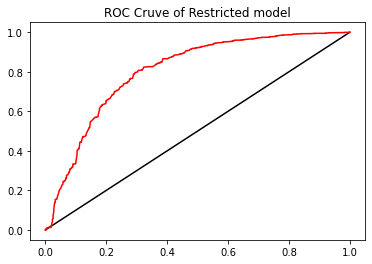

In [98]:
specificity_r, sensitivity_r, _ = metrics.roc_curve(Y, pred_r, pos_label = 1)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'black')
plt.plot(specificity_r, sensitivity_r, "r")
plt.title("ROC Cruve of Restricted model")
plt.show()

In [99]:
# Confusion matrix for unrestricted model:
gamma = 0.5
Y_hatu = np.where(pred_u > gamma, 1, 0)
Y_hat_u = pd.DataFrame(Y_hatu, columns = ['Y_hat_u'])
yyhatu = pd.concat([Y[['happy']], Y_hat_u[['Y_hat_u']]], axis = 1)
print(pd.crosstab(yyhatu.happy, yyhatu.Y_hat_u, margins = True))

Y_hat_u    0     1   All
happy                   
0        114   319   433
1         40  2272  2312
All      154  2591  2745


In [100]:
print(unrestricted_res.pred_table())

[[ 114.  319.]
 [  40. 2272.]]


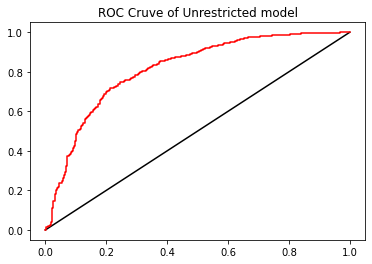

In [101]:
specificity_u, sensitivity_u, _ = metrics.roc_curve(Y, pred_u, pos_label = 1)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'black')
plt.plot(specificity_u, sensitivity_u, "r")
plt.title("ROC Cruve of Unrestricted model")
plt.show()

In [102]:
auc_r = metrics.roc_auc_score(Y, pred_r)
auc_u = metrics.roc_auc_score(Y, pred_u)
print('AUC for restricted model is {}'.format(auc_r))
print('AUC for unrestricted model is {}'.format(auc_u))

AUC for restricted model is 0.8037326090604697
AUC for unrestricted model is 0.8133325874841174


In [103]:
R2MF_r = 1 - restricted_res.llf / restricted_res.llnull
R2MF_u = 1 - unrestricted_res.llf / unrestricted_res.llnull
print('R2MF for restricted model is {}'.format(R2MF_r))
print('R2MF for unrestricted model is {}'.format(R2MF_u))

R2MF for restricted model is 0.12880006248496523
R2MF for unrestricted model is 0.2036305126156419


### Again, the AUC value of the unrestricted model is slightly larger than that of restricted model, and the R2MF value of unrestricted model is closer to 1, which means the unrestricted model is better than the other one.

## 4.3 - Odds ratio, Marginal effect and Elasticity

### By doing all the analysis in part 4.2, we believe that we should use the unrestricted model to interpret our dataset and try to find relationships between those key features and people's happy level.

In [104]:
unrestricted_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                 2745
Model:                          Logit   Df Residuals:                     2708
Method:                           MLE   Df Model:                           36
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.2036
Time:                        19:29:43   Log-Likelihood:                -952.90
converged:                       True   LL-Null:                       -1196.6
Covariance Type:            nonrobust   LLR p-value:                 1.725e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -1.3385      0.747     -1.791      0.073      -2.803       0.126
agea           0.0009      0.001      0.938      0.348      -0.001       0.003
hmsfmlsh       0.0355      0.042      0.854      0.393      -0.046       0.117
domicil        0.1273      0.054      2.341      0.019       0.021       0.234
eduyrs        -0.0146      0.004     -3.646      0.000      -0.022      -0.007
plnftr        -0.0948      0.022     -4.385      0.000      -0.137      -0.052
chldhhe       -0.0095      0.036     -0.262      0.794      -0.080       0.062
dvrcdeva       0.1719      0.109      1.583      0.114      -0.041       0.385
imwbcnt        0.0047      0.005      0.919      0.358      -0.005       0.015
netusoft       0.1537      0.047      3.257      0.001       0.061       0.246
dscrgrp        0.0172      0.070      0.247      0.805      -0.119       0.154
gndr           0.1339      0.123      1.086      0.277      -0.108       0.375
rtrd           0.2522      0.189      1.336      0.182      -0.118       0.622
edctn          0.0162      0.334      0.048      0.961      -0.639       0.671
uempla        -0.8508      0.235     -3.621      0.000      -1.311      -0.390
pdwrk          0.3681      0.191      1.930      0.054      -0.006       0.742
maritalb      -0.0183      0.007     -2.781      0.005      -0.031      -0.005
sclmeet        0.1107      0.038      2.909      0.004       0.036       0.185
hhmmb          0.1309      0.068      1.924      0.054      -0.002       0.264
inprdsc       -0.0004      0.006     -0.060      0.952      -0.013       0.012
stfdem        -0.0029      0.004     -0.735      0.462      -0.011       0.005
stfeco        -0.0068      0.004     -1.606      0.108      -0.015       0.002
stfedu        -0.0052      0.004     -1.392      0.164      -0.013       0.002
stfgov         0.0038      0.003      1.097      0.273      -0.003       0.011
stfhlth        0.0215      0.013      1.646      0.100      -0.004       0.047
stflife        0.0669      0.020      3.409      0.001       0.028       0.105
psppsgva       0.0424      0.047      0.907      0.365      -0.049       0.134
atchctr        0.1114      0.030      3.768      0.000       0.053       0.169
atcherp       -0.0017      0.005     -0.335      0.737      -0.012       0.008
hlthhmp        0.0006      0.109      0.005      0.996      -0.213       0.214
health        -0.5542      0.085     -6.487      0.000      -0.722      -0.387
pplfair        0.0131      0.009      1.526      0.127      -0.004       0.030
ppltrst        0.0925      0.026      3.588      0.000       0.042       0.143
sclact         0.1561      0.067      2.333      0.020       0.025       0.287
trstlgl        0.0012      0.006      0.221      0.825      -0.010       0.012
trstplc        0.0113      0.011      1.027      0.304      -0.010       0.033
trstplt        0.0030      0.006      0.526      0.599      -0.008       0.014
==============================================================================
""

In [107]:
X_unrestricted.head()

,Constant,agea,hmsfmlsh,domicil,eduyrs,plnftr,chldhhe,dvrcdeva,imwbcnt,netusoft,...,atchctr,atcherp,hlthhmp,health,pplfair,ppltrst,sclact,trstlgl,trstplc,trstplt
0,1,38,4,4,13,9,6,2,3,4,...,8,6,2,3,3,2,3,6,7,4
1,1,17,5,4,10,6,2,2,88,5,...,9,7,2,3,5,5,2,88,7,88
2,1,28,5,3,15,3,2,2,5,5,...,7,7,3,2,4,4,3,7,6,5
3,1,29,5,4,20,2,2,2,8,5,...,7,7,3,2,6,6,3,8,6,5
4,1,45,5,4,8,10,6,2,1,5,...,5,0,3,3,3,2,3,5,8,0


## 4.3.1 - Odd

### When we are talking about the odd, we focus on a specific individual. It's not necessary to compute the odds for all the individuals, so we select an individual here as an example of calculating odd and then we try do give interpretations on the results.

In [120]:
# For example, we select the first individual as an example. For calculating his odd, we use Logit model.
beta = unrestricted_res.params
ob = X_unrestricted[0:1].to_numpy()

score = 0
for i in range (0,37):
    score += ob[0][i] * beta[i]
print('score of this individual is: {}'.format(score))

score of this individual is: 1.2318845569980499


In [121]:
odd = np.exp(score)
odd

3.427683117515033

### Interpretation: Ci (odd) for this first individual is 3.43, so the chance he feels happy is 3.43 times the chance he does not feel happy.

### Similarly, we can compute the odds ratio of some variables in our dataset. As we have discussed before, 'stflife', 'sclact', 'health' and 'sclmeet' are the 4 most relevant features, so we compute the odds ratio of these 4 variables and give interpretations.

In [139]:
C = pd.DataFrame(X_unrestricted.columns)
C

,0
0,Constant
1,agea
2,hmsfmlsh
3,domicil
4,eduyrs
5,plnftr
6,chldhhe
7,dvrcdeva
8,imwbcnt
9,netusoft


In [141]:
# sclact:
OR_sclact = np.exp(beta[33])
# health:
OR_health = np.exp(beta[30])
# stflife:
OR_stflife = np.exp(beta[25])
# sclmeet:
OR_sclmeet = np.exp(beta[17])
print('Odds ratio of feature "sclact" is: {}'.format(OR_sclact))
print('Odds ratio of feature "health" is: {}'.format(OR_health))
print('Odds ratio of feature "stflife" is: {}'.format(OR_stflife))
print('Odds ratio of feature "sclmeet" is: {}'.format(OR_sclmeet))

Odds ratio of feature "sclact" is: 1.168975660128164
Odds ratio of feature "health" is: 0.5745297551394619
Odds ratio of feature "stflife" is: 1.069210122899995
Odds ratio of feature "sclmeet" is: 1.1170201346571036


### Interpretations: 
### For 'sclact' (SOCIAL_ACTIVITIES), if people do 1 more unit social activity, the chance of feeling happy would be multiplied by 1.17. This conslusion applies for all the individuals.
### For 'health' (SCORE_HEALTHY), if people have 1 more point in their healthy level, the chance of feeling happy would be multiplied by 0.57. This conslusion applies for all the individuals.
### For 'stflife' (SATISFACTION_LIFE), if people feel 1 more unit satisfaction in their lives, the chance of feeling happy would be multiplied by 1.07. This conslusion applies for all the individuals.
### For 'sclmeet' (MEET_FRIENDS), if people meet 1 more friend, the chance of feeling happy would be multiplied by 1.12. This conslusion applies for all the individuals.
### Among these 4 variables, 'sclact' has the most significant impact.

## 4.3.2 - ME

In [142]:
# For the first individual:
ME_sclact = beta[33] * (np.exp(score) / (1 + np.exp(score)) ** 2)
ME_health = beta[30] * (np.exp(score) / (1 + np.exp(score)) ** 2)
ME_stflife = beta[25] * (np.exp(score) / (1 + np.exp(score)) ** 2)
ME_sclmeet = beta[17] * (np.exp(score) / (1 + np.exp(score)) ** 2)
print('ME of individual 0 (sclact) is: {}'.format(ME_sclact))
print('ME of individual 0 (health) is: {}'.format(ME_health))
print('ME of individual 0 (stflife) is: {}'.format(ME_stflife))
print('ME of individual 0 (sclmeet) is: {}'.format(ME_sclmeet))

ME of individual 0 (sclact) is: 0.02729782294832073
ME of individual 0 (health) is: -0.09689843889770357
ME of individual 0 (stflife) is: 0.011700506365472374
ME of individual 0 (sclmeet) is: 0.019348892307231788


### For this individual, if he does 1 more unit social activity, the chance of feeling happy would increase by 0.027. This conclusion only holds for this specific individual.
### If he has 1 more point in his healthy level, the chance of feeling happy would decrease by 0.097. This conclusion only holds for this specific individual.
### If he feels 1 more unit satisfaction in his life, the chance of feeling happy would increase by 0.012. This conclusion only holds for this specific individual.
### If he meets 1 more friend, the chance of feeling happy would increase by 0.019.
### By focusing on the ME, we found that the healthy status would obviously affect people's feeling of happy.

In [143]:
Xmat = np.array(X_unrestricted)
beta_arr = np.array(beta)
xib = Xmat.dot(beta_arr)
ME_average_sclact = np.mean(beta[33] * (np.exp(xib) / (1 + np.exp(xib)) ** 2))
ME_average_health = np.mean(beta[30] * (np.exp(xib) / (1 + np.exp(xib)) ** 2))
ME_average_stflife = np.mean(beta[25] * (np.exp(xib) / (1 + np.exp(xib)) ** 2))
ME_average_sclmeet = np.mean(beta[17] * (np.exp(xib) / (1 + np.exp(xib)) ** 2))
print('Average ME (sclact) is: {}'.format(ME_average_sclact))
print('Average ME (health) is: {}'.format(ME_average_health))
print('Average ME (stflife) is: {}'.format(ME_average_stflife))
print('Average ME (sclmeet) is: {}'.format(ME_average_sclmeet))

Average ME (sclact) is: 0.016483637576396544
Average ME (health) is: -0.058511579898960685
Average ME (stflife) is: 0.007065285270327093
Average ME (sclmeet) is: 0.011683720306228891


### In average, if people do 1 more unit social activity, the chance of feeling happy would increase by 0.016. This conclusion stands for all the individuals.
### In average, if people have 1 more point in healthy level, the chance of feeling happy would decrease by 0.059. This conclusion stands for all the individuals.
### In average, if people feel 1 more unit satisfaction in their lives, the chance of feeling happy would increase by 0.007. This conclusion stands for all the individuals.
### In average, if people meet 1 more friend, the chance of feeling happy would increase by 0.012. This conclusion stands for all the individuals.
### Health is still the most influential variable.

In [145]:
xbarb = np.mean(Xmat, axis = 0).dot(beta_arr)
ME_atmean_sclact = beta[33] * (np.exp(xbarb) / (1 + np.exp(xbarb)) ** 2)
ME_atmean_health = beta[30] * (np.exp(xbarb) / (1 + np.exp(xbarb)) ** 2)
ME_atmean_stflife = beta[25] * (np.exp(xbarb) / (1 + np.exp(xbarb)) ** 2)
ME_atmean_sclmeet = beta[17] * (np.exp(xbarb) / (1 + np.exp(xbarb)) ** 2)
print('ME at mean of sclact is:{}'.format(ME_atmean_sclact))
print('ME at mean of health is:{}'.format(ME_atmean_health))
print('ME at mean of stflife is:{}'.format(ME_atmean_stflife))
print('ME at mean of sclmeet is:{}'.format(ME_atmean_sclmeet))

ME at mean of sclact is:0.013580283971226195
ME at mean of health is:-0.04820561401876463
ME at mean of stflife is:0.0058208377771030015
ME at mean of sclmeet is:0.009625802488291325


### If people do 1 more unit social activity, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.014.
### If people have 1 more point in healthy level, the chance of the theoretical individual with the average characteristics of feeling happy would decrease by 0.048.
### If people feel 1 more unit satisfaction in their lives, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.006.
### If people meet 1 more friend, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.009.

## 4.3.3 - Elasticity

In [146]:
E_average_sclact = np.mean((beta[33] * Xmat[:, 1]) / (1 + np.exp(xib)))
E_average_health = np.mean((beta[30] * Xmat[:, 1]) / (1 + np.exp(xib)))
E_average_stflife = np.mean((beta[25] * Xmat[:, 1]) / (1 + np.exp(xib)))
E_average_sclmeet = np.mean((beta[17] * Xmat[:, 1]) / (1 + np.exp(xib)))
print('Average Elasticity (sclact) is: {}'.format(E_average_sclact))
print('Average Elasticity (health) is: {}'.format(E_average_health))
print('Average Elasticity (stflife) is: {}'.format(E_average_stflife))
print('Average Elasticity (sclmeet) is: {}'.format(E_average_sclmeet))

Average Elasticity (sclact) is: 1.5504150701570136
Average Elasticity (health) is: -5.503471841915876
Average Elasticity (stflife) is: 0.6645453533726721
Average Elasticity (sclmeet) is: 1.0989452998054081


### In average, if people do 1% more social activity, the chance of feeling happy would increase by 1.55. This conclusion stands for all the individuals.
### In average, if people have 1% more in healthy level, the chance of feeling happy would decrease by 5.50. This conclusion stands for all the individuals.
### In average, if people feel 1% more satisfaction in their lives, the chance of feeling happy would increase by 0.66. This conclusion stands for all the individuals.
### In average, if people meet 1% more friend, the chance of feeling happy would increase by 1.10. This conclusion stands for all the individuals.

In [148]:
E_atmean_sclact = np.mean((beta[33] * np.mean(Xmat[:, 1])) / (1 + np.exp(xbarb)))
E_atmean_health = np.mean((beta[30] * np.mean(Xmat[:, 1])) / (1 + np.exp(xbarb)))
E_atmean_stflife = np.mean((beta[25] * np.mean(Xmat[:, 1])) / (1 + np.exp(xbarb)))
E_atmean_sclmeet = np.mean((beta[17] * np.mean(Xmat[:, 1])) / (1 + np.exp(xbarb)))
print('Elasticity at mean of sclact is:{}'.format(E_atmean_sclact))
print('Elasticity at mean of health is:{}'.format(E_atmean_health))
print('Elasticity at mean of stflife is:{}'.format(E_atmean_stflife))
print('Elasticity at mean of sclmeet is:{}'.format(E_atmean_sclmeet))

Elasticity at mean of sclact is:0.8794585776040137
Elasticity at mean of health is:-3.1217933901306276
Elasticity at mean of stflife is:0.3769571919675028
Elasticity at mean of sclmeet is:0.6233665350876676


### If people do 1% more social activity, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.879.
### If people have 1% more in healthy level, the chance of the theoretical individual with the average characteristics of feeling happy would decrease by 3.122.
### If people feel 1% more satisfaction in their lives, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.377.
### If people meet 1% more friend, the chance of the theoretical individual with the average characteristics of feeling happy would increase by 0.623.
### Health is still the most influential.

## 4.4 - Qualitative interpretations ('uempla' as example)

In [149]:
unrestricted_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  happy   No. Observations:                 2745
Model:                          Logit   Df Residuals:                     2708
Method:                           MLE   Df Model:                           36
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.2036
Time:                        20:53:11   Log-Likelihood:                -952.90
converged:                       True   LL-Null:                       -1196.6
Covariance Type:            nonrobust   LLR p-value:                 1.725e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -1.3385      0.747     -1.791      0.073      -2.803       0.126
agea           0.0009      0.001      0.938      0.348      -0.001       0.003
hmsfmlsh       0.0355      0.042      0.854      0.393      -0.046       0.117
domicil        0.1273      0.054      2.341      0.019       0.021       0.234
eduyrs        -0.0146      0.004     -3.646      0.000      -0.022      -0.007
plnftr        -0.0948      0.022     -4.385      0.000      -0.137      -0.052
chldhhe       -0.0095      0.036     -0.262      0.794      -0.080       0.062
dvrcdeva       0.1719      0.109      1.583      0.114      -0.041       0.385
imwbcnt        0.0047      0.005      0.919      0.358      -0.005       0.015
netusoft       0.1537      0.047      3.257      0.001       0.061       0.246
dscrgrp        0.0172      0.070      0.247      0.805      -0.119       0.154
gndr           0.1339      0.123      1.086      0.277      -0.108       0.375
rtrd           0.2522      0.189      1.336      0.182      -0.118       0.622
edctn          0.0162      0.334      0.048      0.961      -0.639       0.671
uempla        -0.8508      0.235     -3.621      0.000      -1.311      -0.390
pdwrk          0.3681      0.191      1.930      0.054      -0.006       0.742
maritalb      -0.0183      0.007     -2.781      0.005      -0.031      -0.005
sclmeet        0.1107      0.038      2.909      0.004       0.036       0.185
hhmmb          0.1309      0.068      1.924      0.054      -0.002       0.264
inprdsc       -0.0004      0.006     -0.060      0.952      -0.013       0.012
stfdem        -0.0029      0.004     -0.735      0.462      -0.011       0.005
stfeco        -0.0068      0.004     -1.606      0.108      -0.015       0.002
stfedu        -0.0052      0.004     -1.392      0.164      -0.013       0.002
stfgov         0.0038      0.003      1.097      0.273      -0.003       0.011
stfhlth        0.0215      0.013      1.646      0.100      -0.004       0.047
stflife        0.0669      0.020      3.409      0.001       0.028       0.105
psppsgva       0.0424      0.047      0.907      0.365      -0.049       0.134
atchctr        0.1114      0.030      3.768      0.000       0.053       0.169
atcherp       -0.0017      0.005     -0.335      0.737      -0.012       0.008
hlthhmp        0.0006      0.109      0.005      0.996      -0.213       0.214
health        -0.5542      0.085     -6.487      0.000      -0.722      -0.387
pplfair        0.0131      0.009      1.526      0.127      -0.004       0.030
ppltrst        0.0925      0.026      3.588      0.000       0.042       0.143
sclact         0.1561      0.067      2.333      0.020       0.025       0.287
trstlgl        0.0012      0.006      0.221      0.825      -0.010       0.012
trstplc        0.0113      0.011      1.027      0.304      -0.010       0.033
trstplt        0.0030      0.006      0.526      0.599      -0.008       0.014
==============================================================================
""

### In this model, 'uempla' (IS_UNEMPLOYED) is a binary variable and its pvalue is smaller than 0.05. Coefficient to this variable is -0.8508. Thus, a single individual who is unemployed will have less chance to feel happy compared to an individual who has a job.The gap between the two situations is -0.8508.

In [150]:
OR_uempla = np.exp(beta[14])
OR_uempla

0.4270808435616196

### The odds ratio of this variable is 0.427, which is much smaller than 1. It means the difference between the unemployed people and employed people is significant.